# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Gesundheitskosten im Vergleich"
### 1.2 Fragestellung:
- "  1. Gibt es eine inverse Beziehung zwischen öffentlichen Ausgaben und Out-of-Pocket-Ausgaben? "
- " 2. In welchen Ländern gibt es ein Gleichgewicht oder extreme Unterschiede? "   
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org/financing-healthcare





### 1.4 Daten beschaffen und laden

In [ ]:
#  Bibliotheken laden 

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [16]:
# Datenset 1: Öffentliche Gesundheitsausgaben importieren
df1 = pd.read_csv("public-health-expenditure-share-gdp.csv", skiprows=1, 
                 names=["Gebiet", "Code1", "Jahr", "öffentliche Gesundheitsausgaben"])
df1.head()

,Gebiet,Code1,Jahr,öffentliche Gesundheitsausgaben
0,Albania,ALB,2010,2.442
1,Albania,ALB,2011,2.387
2,Albania,ALB,2012,2.474
3,Albania,ALB,2013,2.605
4,Albania,ALB,2014,2.617


In [17]:
# Datenset 2: Selbstgetragene Gesundheitskosten importieren
df2 = pd.read_csv("share-of-out-of-pocket-expenditure-on-healthcare.csv", skiprows=1, 
                 names=["Gebiet", "Code2", "Jahr", "Selbstgetragene Gesundheitsausgaben"])
df2.head()

,Gebiet,Code2,Jahr,Selbstgetragene Gesundheitsausgaben
0,Afghanistan,AFG,2002,85.375600
1,Afghanistan,AFG,2003,86.069190
2,Afghanistan,AFG,2004,84.527590
3,Afghanistan,AFG,2005,78.970085
4,Afghanistan,AFG,2006,76.824974


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [ ]:
# Vorbereitung Datenset 1: Öffentliche Gesundheitsausgaben
df1_pivot = df1.pivot(index="Gebiet", columns="Jahr", values="öffentliche Gesundheitsausgaben")
df1_pivot.head()

Jahr,1880,1890,1900,1910,1920,1930,1960,1961,1962,1963,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.474,2.605,2.617,2.755,2.842,2.762,2.878,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.144,6.264,6.361,6.853,5.619,6.644,5.965,5.954,NaN,NaN
Australia,0.00,0.00,0.00,0.38,0.57,0.44,1.913670,2.092822,2.231257,2.141681,...,5.859,5.685,6.658,6.985,6.942,6.991,7.009,7.361,7.612,NaN
Austria,0.00,0.00,0.00,0.00,0.00,0.00,2.635009,2.660758,2.703673,2.780921,...,7.617,7.612,7.673,7.678,7.657,7.686,7.724,7.865,8.772,9.555
Belgium,0.06,0.11,0.12,0.18,0.21,0.09,1.683308,1.707128,1.730949,1.850051,...,8.033,8.040,8.079,8.265,8.305,8.304,8.337,8.107,8.491,NaN


In [ ]:
#Vorbereitung Datenset 2: Selbstgetragene Gesundheitsausgaben
df2_pivot = df2.pivot(index="Gebiet", columns="Jahr", values="Selbstgetragene Gesundheitsausgaben")
df2_pivot.head()

Jahr,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,85.375600,86.069190,84.527590,78.970085,76.824974,78.169980,75.403390,72.779240,...,74.486206,72.047860,73.055920,78.382290,75.974335,75.482580,76.223020,76.818370,74.813965,77.21405
Albania,51.814300,49.128300,50.855670,47.601320,47.047787,48.436172,48.580803,51.285343,56.224728,57.505250,...,58.832058,57.825634,59.115170,57.168310,57.053867,57.464123,56.489650,NaN,NaN,NaN
Algeria,25.794514,21.668524,22.524883,21.148638,26.094326,28.093613,29.121359,28.088581,26.146960,27.449507,...,25.715908,27.561977,26.658457,28.208338,30.883596,32.535194,32.628517,33.399155,35.804718,NaN
Andorra,15.397888,15.555239,15.046601,16.053387,16.933514,15.962100,17.888039,17.996744,15.578386,14.393357,...,13.563203,13.268412,12.671029,12.910532,12.377317,11.934806,12.246914,12.595785,10.925110,NaN
Angola,27.304688,45.091087,49.662052,48.510690,46.891098,42.332657,30.665700,28.383972,21.653238,15.508905,...,17.619177,21.349277,26.876167,33.523167,35.208930,34.121014,36.264200,37.887154,37.144620,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)



In [22]:
df1.dtypes


Gebiet                              object
Code1                               object
Jahr                                 int64
öffentliche Gesundheitsausgaben    float64
dtype: object

In [28]:
df2.dtypes

Gebiet                                  object
Code2                                   object
Jahr                                     int64
Selbstgetragene Gesundheitsausgaben    float64
dtype: object

### 3.1 Analyse Gebiete

In [ ]:
# Anzahl Gebiete pro Datensatz
nCountries = len(df1["Gebiet"].unique())

print("Anzahl Länder öffentliche Gesundheitsausgaben: ", nCountries)

nCountries = len(df2["Gebiet"].unique())

print("Anzahl Länder Selbstgetragene Gesundheitsausgaben: ", nCountries)

Anzahl Länder öffentliche Gesundheitsausgaben:  53
Anzahl Länder Selbstgetragene Gesundheitsausgaben:  204


In [ ]:
#Anzahl Datenpunkte pro Gebiet: Datenset 1 Öffentliche Gesundheitsausgaben 
df1['Gebiet'].value_counts()


Gebiet
Italy              68
Denmark            68
United Kingdom     68
Austria            68
Sweden             68
Norway             68
Canada             68
New Zealand        67
Netherlands        67
Japan              67
Greece             67
Germany            67
France             67
Finland            67
United States      67
Australia          67
Belgium            67
Switzerland        66
Ireland            63
Iceland            62
Portugal           62
Spain              61
Turkey             59
South Korea        52
Luxembourg         46
Poland             32
Czechia            31
Hungary            31
Israel             26
Slovakia           24
Estonia            23
Mexico             22
Chile              22
Lithuania          22
Costa Rica         21
Latvia             21
Colombia           21
Slovenia           21
China              20
India              20
Brazil             20
Peru               20
South Africa       20
Argentina          20
Bulgaria           18
Rom

Text(0.5, 1.0, 'Anzahl Datenpunkte pro Gebiet: öffentliche Gesundheitsausgaben')

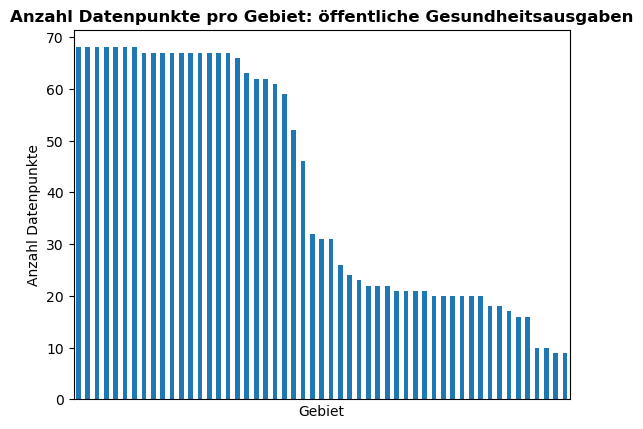

In [46]:
df1['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[ ], 
                                 ylabel= 'Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet: öffentliche Gesundheitsausgaben')
plt.title('Anzahl Datenpunkte pro Gebiet: öffentliche Gesundheitsausgaben', fontweight='bold')

In [26]:
#Anzahl Datenpunkte pro Gebiet: Datenset 2 Selbstgetragene Gesundheitskosten 
df2['Gebiet'].value_counts()

Gebiet
South Korea    22
Ireland        22
Philippines    22
Canada         22
Luxembourg     22
               ..
Syria          13
Libya          12
Zimbabwe       11
Montenegro     10
South Sudan     4
Name: count, Length: 204, dtype: int64

Text(0.5, 1.0, 'Anzahl Datenpunkte pro Gebiet: selbstgetragene Gesundheitskosten')

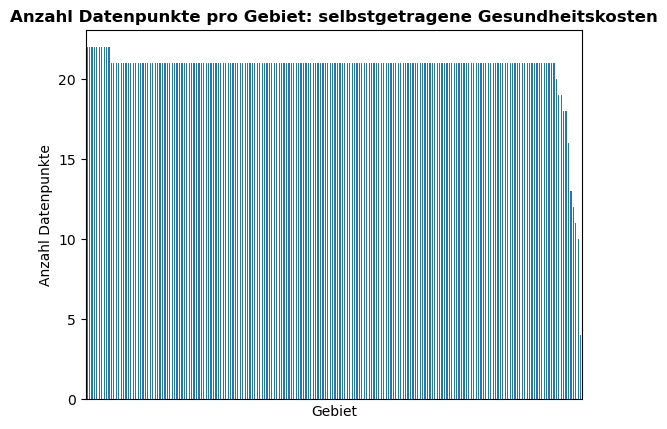

In [45]:
df2['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[ ], 
                                 ylabel= 'Anzahl Datenpunkte',title='Anzahl Datenpunkte pro Gebiet: selbstgetragene Gesundheitskosten')
plt.title('Anzahl Datenpunkte pro Gebiet: selbstgetragene Gesundheitskosten', fontweight='bold')

### 3.1.2 Analyse Codes

In [12]:
print('Anzahl verschiedener Codes öffentliche Gesundheitsausgaben: ' , len(df1['Code1'].unique()))
print('Anzahl verschiedener Codes selbstgetragene Gesundheitskosten: ' , len(df2['Code2'].unique()))

Anzahl verschiedener Codes öffentliche Gesundheitsausgaben:  53
Anzahl verschiedener Codes selbstgetragene Gesundheitskosten:  192


In [56]:
missing_data = df2[df2['Code2'].isnull()]
missing_codes = missing_data['Code2']
print("Countries with missing category codes:")
print(missing_codes)


Countries with missing category codes:
1050    NaN
1051    NaN
1052    NaN
1053    NaN
1054    NaN
       ... 
4044    NaN
4045    NaN
4046    NaN
4047    NaN
4048    NaN
Name: Code2, Length: 273, dtype: object


### 3.2 Analyse Jahre

In [7]:
nYears = len(df1["Jahr"].unique())

print("Anzahl Jahren öffentliche Gesundheitsausgaben: ", nYears)

nYears = len(df2["Jahr"].unique())

print("Anzahl Jahren Selbstgetragene Gesundheitsausgaben: ", nYears)

Anzahl Jahren öffentliche Gesundheitsausgaben:  68
Anzahl Jahren Selbstgetragene Gesundheitsausgaben:  22


Text(0.5, 1.0, 'Anzahl Datenpuntkte pro Jahr: öffentliche Gesundheitsausgaben')

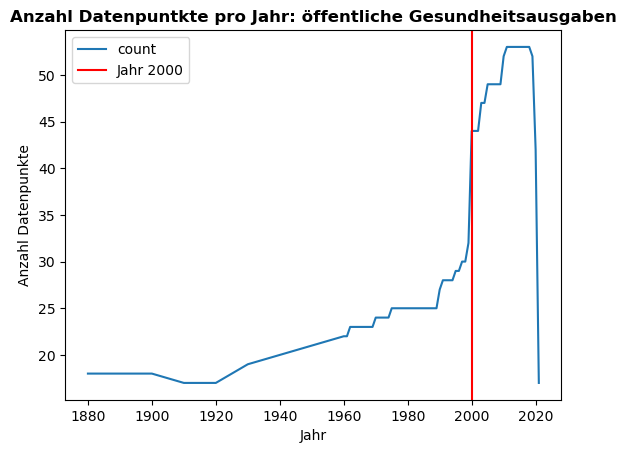

In [64]:
g = df1['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr: öffentliche Gesundheitsausgaben')
g.axvline(x=2000, color='red', label='Jahr 2000')
g.legend()
plt.title('Anzahl Datenpuntkte pro Jahr: öffentliche Gesundheitsausgaben', fontweight='bold')


Text(0.5, 1.0, 'Anzahl Datenpuntkte pro Jahr: selbstgetragene Gesundheitskosten')

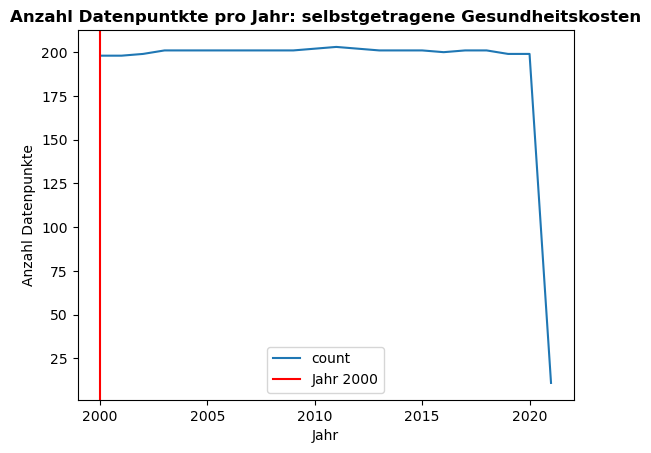

In [63]:
g = df2['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpuntkte pro Jahr: öffentliche Gesundheitsausgaben')
g.axvline(x=2000, color='red', label='Jahr 2000')
g.legend()
plt.title('Anzahl Datenpuntkte pro Jahr: selbstgetragene Gesundheitskosten', fontweight='bold')

### 3.4 Analyse Kosten

In [65]:
df1.describe()

,Jahr,öffentliche Gesundheitsausgaben
count,2177.000000,2177.000000
mean,1991.327515,4.627465
std,26.330405,2.218401
min,1880.000000,0.000000
25%,1978.000000,3.246000
50%,1999.000000,4.712000
75%,2010.000000,6.029000
max,2021.000000,15.949000


In [66]:
df2.describe()


,Jahr,Selbstgetragene Gesundheitsausgaben
count,4223.000000,4223.000000
mean,2010.036467,33.644061
std,6.059714,19.442344
min,2000.000000,0.080350
25%,2005.000000,16.885437
50%,2010.000000,31.515785
75%,2015.000000,47.637738
max,2021.000000,86.069190


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



In [15]:
df1.drop("Code", axis=1, inplace=True)
df1 = df1[~((df1["Jahr"] >= 1880) & (df1["Jahr"] <= 1999))]
df1.head()

KeyError: "['Code'] not found in axis"

In [ ]:
df2 = pd.read_csv("share-of-out-of-pocket-expenditure-on-healthcare.csv", skiprows=1, 
                 names=["Land", "Code", "Jahr", "Selbstgetragene Gesundheitsausgaben"])
df2.drop("Code", axis=1, inplace=True)
df2.head()

,Land,Jahr,Selbstgetragene Gesundheitsausgaben
0,Afghanistan,2002,85.375600
1,Afghanistan,2003,86.069190
2,Afghanistan,2004,84.527590
3,Afghanistan,2005,78.970085
4,Afghanistan,2006,76.824974
